In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
import time
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, f1_score, make_scorer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
import plotly.express as px
import plotly.graph_objects as go

In [6]:
df=pd.read_csv("Salary_Data.csv")

In [7]:
df

,Age,Gender,Education_Level,Job_Title,Years_of_Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
370,35.0,Female,Bachelor's,Senior Marketing Analyst,8.0,85000.0
371,43.0,Male,Master's,Director of Operations,19.0,170000.0
372,29.0,Female,Bachelor's,Junior Project Manager,2.0,40000.0
373,34.0,Male,Bachelor's,Senior Operations Coordinator,7.0,90000.0


In [8]:
def check_df(df, head=5):
    print("##################### Shape #####################")
    print(df.shape)
    
    print("##################### Types #####################")
    print(df.dtypes)
    
    print("##################### Head #####################")
    print(df.head(head))
    
    print("##################### Tail #####################")
    print(df.tail(head))
    
    print("##################### NA #####################")
    print(df.isnull().sum())
    
    print("##################### Describe #####################")
    print(df.describe().T)
check_df(df)

##################### Shape #####################
(375, 6)
##################### Types #####################
Age                    float64
Gender                  object
Education_Level         object
Job_Title               object
Years_of_Experience    float64
Salary                 float64
dtype: object
##################### Head #####################
    Age  Gender Education_Level          Job_Title  Years_of_Experience  \
0  32.0    Male      Bachelor's  Software Engineer                  5.0   
1  28.0  Female        Master's       Data Analyst                  3.0   
2  45.0    Male             PhD     Senior Manager                 15.0   
3  36.0  Female      Bachelor's    Sales Associate                  7.0   
4  52.0    Male        Master's           Director                 20.0   

     Salary  
0   90000.0  
1   65000.0  
2  150000.0  
3   60000.0  
4  200000.0  
##################### Tail #####################
      Age  Gender Education_Level                      Job

In [9]:
def check(df, head=5):
   
    print("##################### NA #####################")
    print(df.isnull().sum())
    
    print("##################### Describe #####################")
    print(df.describe().T)

    print("##################### Job_Title value_counts #####################")
    print(df.Job_Title.value_counts())
check(df)

##################### NA #####################
Age                    2
Gender                 2
Education_Level        2
Job_Title              2
Years_of_Experience    2
Salary                 2
dtype: int64
##################### Describe #####################
                     count           mean           std    min      25%  \
Age                  373.0      37.431635      7.069073   23.0     31.0   
Years_of_Experience  373.0      10.030831      6.557007    0.0      4.0   
Salary               373.0  100577.345845  48240.013482  350.0  55000.0   

                         50%       75%       max  
Age                     36.0      44.0      53.0  
Years_of_Experience      9.0      15.0      25.0  
Salary               95000.0  140000.0  250000.0  
##################### Job_Title value_counts #####################
Job_Title
Director of Marketing              12
Director of Operations             11
Senior Business Analyst            10
Senior Marketing Analyst            9
Sen

In [10]:
def grab_col_names(df, cat_th=10, car_th=20):
    """

    Veri setindeki kategorik, numerik ve kategorik fakat kardinal değişkenlerin isimlerini verir.
    Not: Kategorik değişkenlerin içerisine numerik görünümlü kategorik değişkenler de dahildir.

    Parameters
    ------
        dataframe: dataframe
                Değişken isimleri alınmak istenilen dataframe
        cat_th: int, optional
                numerik fakat kategorik olan değişkenler için sınıf eşik değeri
        car_th: int, optional
                kategorik fakat kardinal değişkenler için sınıf eşik değeri

    Returns
    ------
        cat_cols: list
                Kategorik değişken listesi
        num_cols: list
                Numerik değişken listesi
        cat_but_car: list
                Kategorik görünümlü kardinal değişken listesi

    Examples
    ------
        import seaborn as sns
        df = sns.load_dataset("iris")
        print(grab_col_names(df))


    Notes
    ------
        cat_cols + num_cols + cat_but_car = toplam değişken sayısı
        num_but_cat cat_cols'un içerisinde.

    """
    # cat_cols, cat_but_car
    cat_cols = [col for col in df.columns if df[col].dtypes == "O"]
    num_but_cat = [col for col in df.columns if df[col].nunique() < cat_th and df[col].dtypes != "O"]
    cat_but_car = [col for col in df.columns if df[col].nunique() > car_th and df[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in df.columns if df[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {df.shape[0]}")
    print(f"Variables: {df.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')

    return cat_cols, num_cols, cat_but_car


cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 375
Variables: 6
cat_cols: 2
num_cols: 3
cat_but_car: 1
num_but_cat: 0


In [11]:
cat_cols

['Gender', 'Education_Level']

In [12]:
num_cols

['Age', 'Years_of_Experience', 'Salary']

In [13]:
cat_but_car

['Job_Title']

In [14]:
def cat_summary(df, col_name, plot=False):
    print(pd.DataFrame({col_name: df[col_name].value_counts(),
                        "Ratio": 100 * df[col_name].value_counts() / len(df)}))
    print("##########################################")
    if plot:
        sns.countplot(x=df[col_name], data=dataframe)
        plt.show()

for col in cat_cols:
    cat_summary(df, col)

        Gender      Ratio
Gender                   
Male       194  51.733333
Female     179  47.733333
##########################################
                 Education_Level      Ratio
Education_Level                            
Bachelor's                   224  59.733333
Master's                      98  26.133333
PhD                           51  13.600000
##########################################


count    373.000000
mean      37.431635
std        7.069073
min       23.000000
5%        27.000000
10%       29.000000
20%       31.000000
30%       33.000000
40%       35.000000
50%       36.000000
60%       39.000000
70%       42.000000
80%       45.000000
90%       47.000000
95%       49.000000
99%       51.280000
max       53.000000
Name: Age, dtype: float64


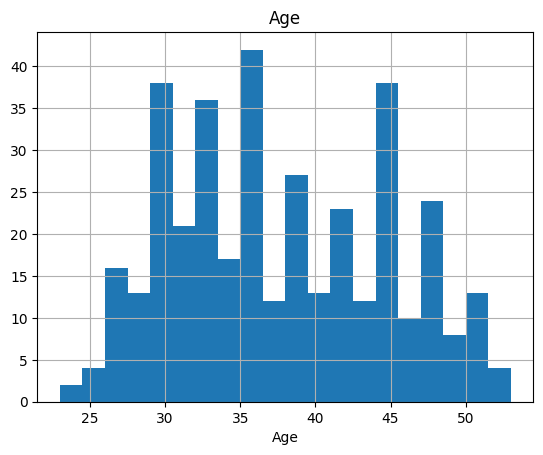

count    373.000000
mean      10.030831
std        6.557007
min        0.000000
5%         1.500000
10%        2.000000
20%        3.000000
30%        5.000000
40%        7.000000
50%        9.000000
60%       11.000000
70%       14.000000
80%       16.000000
90%       20.000000
95%       21.000000
99%       23.280000
max       25.000000
Name: Years_of_Experience, dtype: float64


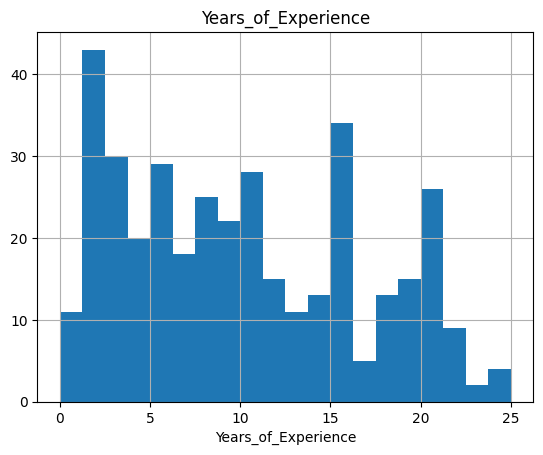

count       373.000000
mean     100577.345845
std       48240.013482
min         350.000000
5%        40000.000000
10%       40000.000000
20%       50000.000000
30%       60000.000000
40%       85000.000000
50%       95000.000000
60%      110000.000000
70%      130000.000000
80%      150000.000000
90%      170000.000000
95%      180000.000000
99%      200000.000000
max      250000.000000
Name: Salary, dtype: float64


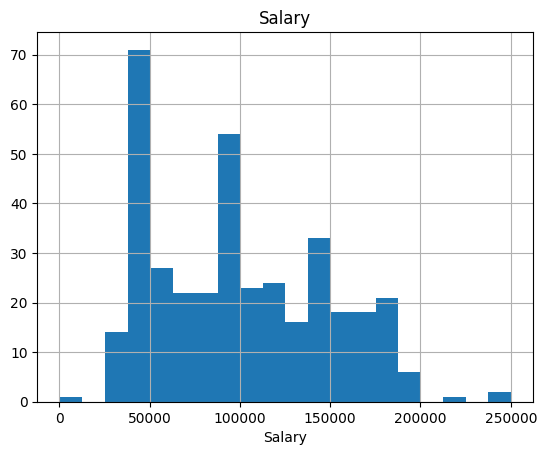

In [15]:
def num_summary(df, numerical_col, plot=False):
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    print(df[numerical_col].describe(quantiles).T)

    if plot:
        df[numerical_col].hist(bins=20)
        plt.xlabel(numerical_col)
        plt.title(numerical_col)
        plt.show()

for col in num_cols:
    num_summary(df, col, plot=True)

<Axes: ylabel='Education_Level'>

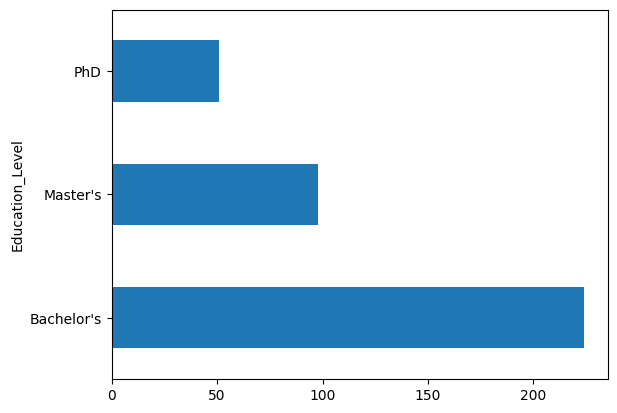

In [16]:
df.Education_Level.value_counts().plot.barh()

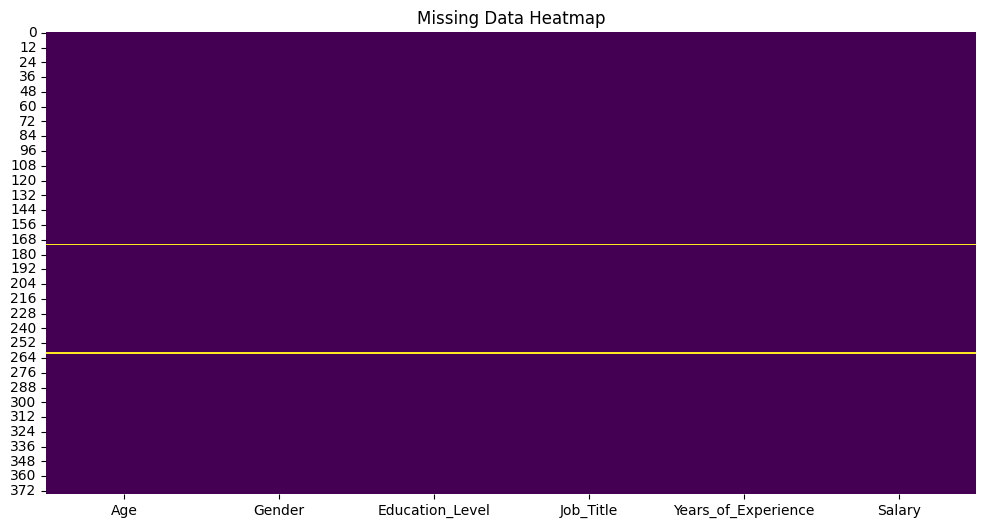

In [17]:
def plot_missing_data(dataframe):
    """Eksik verileri görselleştirir"""
    plt.figure(figsize=(12, 6))
    sns.heatmap(dataframe.isnull(), cbar=False, cmap='viridis')
    plt.title('Missing Data Heatmap')
    plt.show()
plot_missing_data(df)

In [18]:
def remove_duplicates_and_report(df):
    """
    Verilen DataFrame'deki tekrar eden satırları siler ve işlem öncesi ve sonrası satır sayısını rapor eder.

    Args:
        df (pd.DataFrame): İşlenecek olan DataFrame.

    Returns:
        pd.DataFrame: Tekrar eden satırları silinmiş olan DataFrame.
    """
    if df is None:
        raise ValueError("Input DataFrame is None")

    initial_row_count = df.shape[0]
    print(f"Toplam satır sayısı (duplicate kontrolünden önce): {initial_row_count}")
    
    df.drop_duplicates(inplace=True)
    
    final_row_count = df.shape[0]
    print(f"Toplam satır sayısı (duplicate kontrolünden sonra): {final_row_count}")
    
    return df


In [19]:
remove_duplicates_and_report(df)

Toplam satır sayısı (duplicate kontrolünden önce): 375
Toplam satır sayısı (duplicate kontrolünden sonra): 325


,Age,Gender,Education_Level,Job_Title,Years_of_Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
348,28.0,Female,Bachelor's,Junior Operations Manager,1.0,35000.0
349,36.0,Male,Bachelor's,Senior Business Development Manager,8.0,110000.0
350,44.0,Female,PhD,Senior Data Scientist,16.0,160000.0
351,31.0,Male,Bachelor's,Junior Marketing Coordinator,3.0,55000.0


In [20]:
df.isnull().sum()

Age                    1
Gender                 1
Education_Level        1
Job_Title              1
Years_of_Experience    1
Salary                 1
dtype: int64

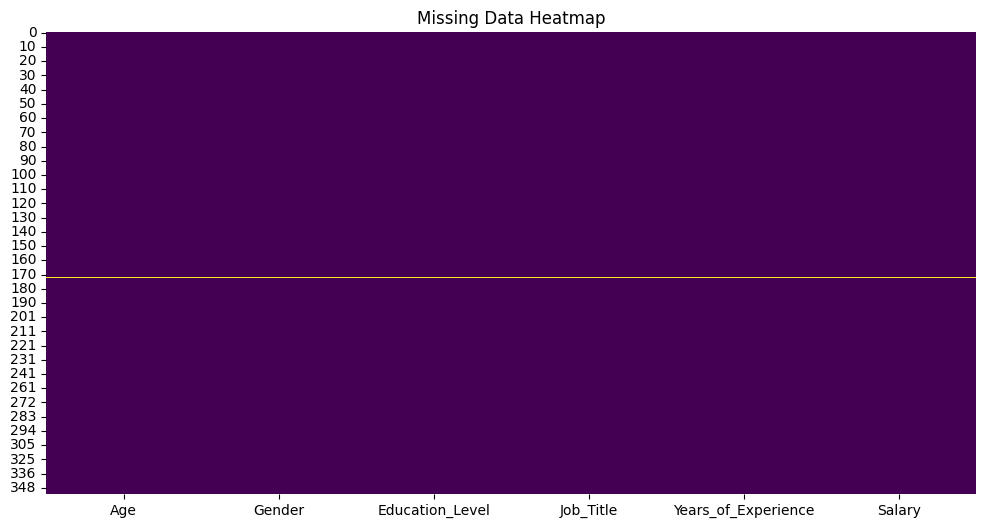

In [21]:
def plot_missing_data(dataframe):
    """Eksik verileri görselleştirir"""
    plt.figure(figsize=(12, 6))
    sns.heatmap(dataframe.isnull(), cbar=False, cmap='viridis')
    plt.title('Missing Data Heatmap')
    plt.show()
plot_missing_data(df)

In [22]:
def bos_degerler(dataframe):
    na_rows = dataframe[dataframe.isnull().any(axis=1)]
    return na_rows
bos_degerler(df)

,Age,Gender,Education_Level,Job_Title,Years_of_Experience,Salary
172,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
def drop_na_rows(dataframe):
    dataframe_cleaned = dataframe.dropna(how='all',inplace=True)
    return dataframe_cleaned
drop_na_rows(df)

In [24]:
def _numeric_na_doldurma(dataframe):
    """Sayısal özelliklerdeki eksik verileri doldurur"""
    numeric_columns = dataframe.select_dtypes(include=[np.number]).columns.tolist()
    dataframe[numeric_columns] = dataframe[numeric_columns].fillna(dataframe[numeric_columns].mean())
_numeric_na_doldurma(df)

In [25]:
def categorical_na_doldurma(dataframe):
    """Kategorik özelliklerdeki eksik verileri doldurur"""
    categorical_columns = dataframe.select_dtypes(include=[object]).columns.tolist()
    dataframe[categorical_columns] = dataframe[categorical_columns].apply(lambda x: x.fillna(x.mode()[0]))
categorical_na_doldurma(df)   

In [26]:
def fill_categorical_cardinal_na(dataframe, columns, strategy='mode'):
    """Kategorik görünümlü kardinal değişkenlerdeki eksik verileri doldurur"""
    
    if strategy == 'mode':
        # En yaygın kategori ile doldurma
        for column in columns:
            dataframe[column].fillna(dataframe[column].mode()[0], inplace=True)
    elif strategy == 'random':
        # Küçük bir rastgele örnekleme kullanarak doldurma
        for column in columns:
            na_indices = dataframe[column].isnull()
            fill_values = dataframe.loc[~na_indices, column]
            dataframe.loc[na_indices, column] = [random.choice(fill_values) for _ in range(na_indices.sum())]
    elif strategy == 'special_category':
        # Özel bir kategori ile doldurma
        for column in columns:
            dataframe[column].fillna('Missing', inplace=True)
    else:
        raise ValueError("Supported strategies are: 'mode', 'random', 'special_category'")
    
fill_categorical_cardinal_na(df,['Job_Title'],strategy='mode')

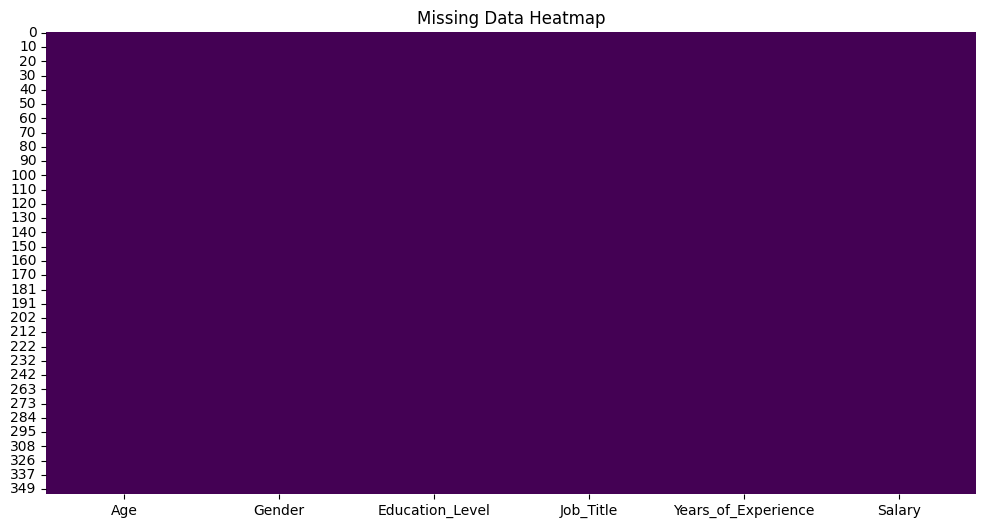

In [27]:
def plot_missing_data(dataframe):
    """Eksik verileri görselleştirir"""
    plt.figure(figsize=(12, 6))
    sns.heatmap(dataframe.isnull(), cbar=False, cmap='viridis')
    plt.title('Missing Data Heatmap')
    plt.show()
plot_missing_data(df)

In [28]:
print(df.isnull().sum()) 

Age                    0
Gender                 0
Education_Level        0
Job_Title              0
Years_of_Experience    0
Salary                 0
dtype: int64


In [29]:
df['Job_Title'].unique()

array(['Software Engineer', 'Data Analyst', 'Senior Manager',
       'Sales Associate', 'Director', 'Marketing Analyst',
       'Product Manager', 'Sales Manager', 'Marketing Coordinator',
       'Senior Scientist', 'Software Developer', 'HR Manager',
       'Financial Analyst', 'Project Manager', 'Customer Service Rep',
       'Operations Manager', 'Marketing Manager', 'Senior Engineer',
       'Data Entry Clerk', 'Sales Director', 'Business Analyst',
       'VP of Operations', 'IT Support', 'Recruiter', 'Financial Manager',
       'Social Media Specialist', 'Software Manager', 'Junior Developer',
       'Senior Consultant', 'Product Designer', 'CEO', 'Accountant',
       'Data Scientist', 'Marketing Specialist', 'Technical Writer',
       'HR Generalist', 'Project Engineer', 'Customer Success Rep',
       'Sales Executive', 'UX Designer', 'Operations Director',
       'Network Engineer', 'Administrative Assistant',
       'Strategy Consultant', 'Copywriter', 'Account Manager',
      

In [30]:
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans

# BERT modeli ile metin vektörleştirme
model = SentenceTransformer('all-MiniLM-L6-v2')
job_titles = df['Job_Title'].tolist()
embeddings = model.encode(job_titles)

# K-Means kümeleme
num_clusters = 10  # Oluşturmak istediğiniz küme sayısı
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df['job_title_bert_cluster'] = kmeans.fit_predict(embeddings)

# Grupları ve iş unvanlarını görüntüleme
print(df[['Job_Title', 'job_title_bert_cluster']].head())

c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sentence_transformers\cross_encoder\CrossEncoder.py:11: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm, trange
c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


           Job_Title  job_title_bert_cluster
0  Software Engineer                       9
1       Data Analyst                       3
2     Senior Manager                       6
3    Sales Associate                       4
4           Director                       2


c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\

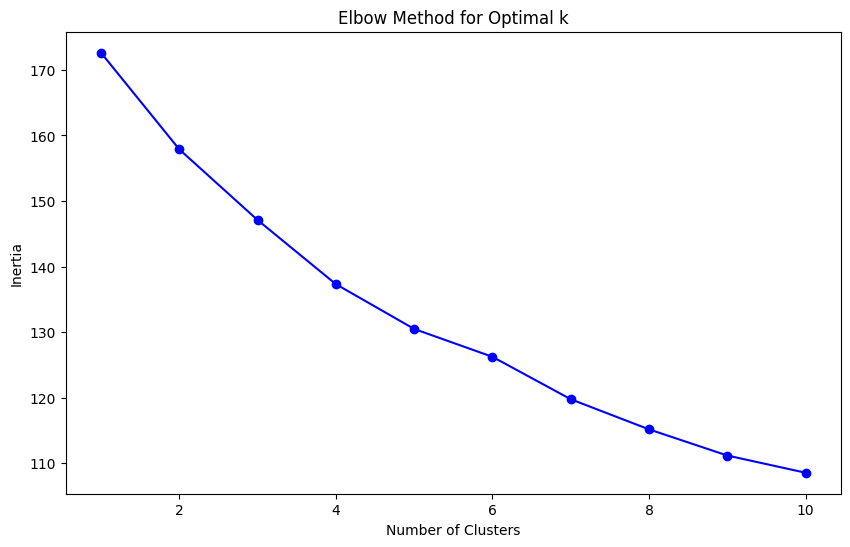

In [31]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Farklı küme sayıları için K-means'in toplam hata karesini hesaplama
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(embeddings)
    inertia.append(kmeans.inertia_)

# Elbow grafiği çizme
plt.figure(figsize=(10, 6))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\

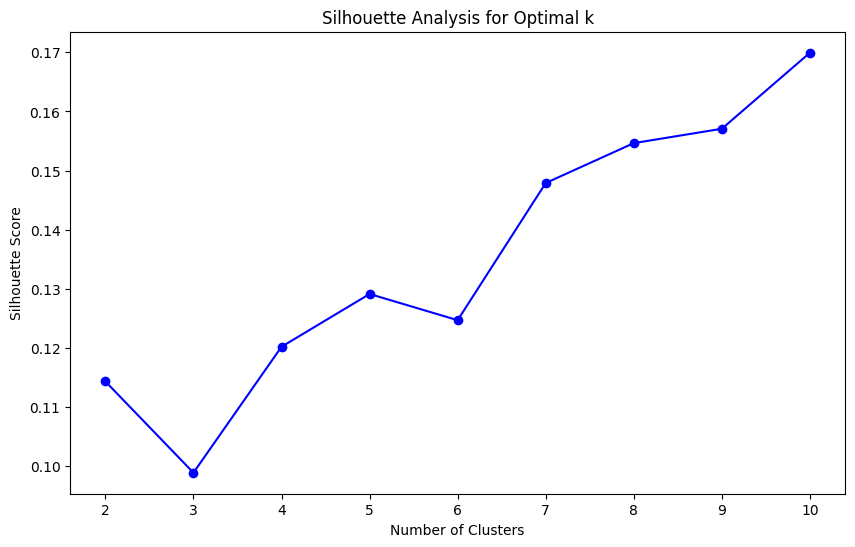

In [32]:
from sklearn.metrics import silhouette_score

# Farklı küme sayıları için Silhouette skorunu hesaplama
silhouette_scores = []
K = range(2, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(embeddings)
    score = silhouette_score(embeddings, kmeans.labels_)
    silhouette_scores.append(score)

# Silhouette skoru grafiği çizme
plt.figure(figsize=(10, 6))
plt.plot(K, silhouette_scores, 'bo-')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis for Optimal k')
plt.show()

In [33]:
import numpy as np

# Inertia değerlerinin birinci türevini hesaplama
inertia_diff = np.diff(inertia)

# Birinci türevin ikinci türevini hesaplama
inertia_diff2 = np.diff(inertia_diff)

# En büyük ikinci türev değerinin indeksini bulma
optimal_clusters = np.argmax(inertia_diff2) + 2  # İkinci türev farklarının indeksi, küme sayısı 2'den başladığı için +2 ekliyoruz

print(f'Optimal küme sayısı: {optimal_clusters}')

Optimal küme sayısı: 2


In [34]:
# En yüksek Silhouette skoruna sahip küme sayısını belirleme
optimal_clusters = K[np.argmax(silhouette_scores)]
print(f'Optimal küme sayısı: {optimal_clusters}')

Optimal küme sayısı: 10


In [35]:
df.head()

,Age,Gender,Education_Level,Job_Title,Years_of_Experience,Salary,job_title_bert_cluster
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,9
1,28.0,Female,Master's,Data Analyst,3.0,65000.0,3
2,45.0,Male,PhD,Senior Manager,15.0,150000.0,6
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,4
4,52.0,Male,Master's,Director,20.0,200000.0,2


In [36]:
df.drop(['Job_Title'], axis=1, inplace=True)

In [37]:
def aykiriDeger_tespiti(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

In [38]:
aykiriDeger_tespiti(df,"Age")

,Age,Gender,Education_Level,Years_of_Experience,Salary,job_title_bert_cluster


In [39]:
aykiriDeger_tespiti(df,"Years_of_Experience")

,Age,Gender,Education_Level,Years_of_Experience,Salary,job_title_bert_cluster


In [40]:
aykiriDeger_tespiti(df,"Salary")

,Age,Gender,Education_Level,Years_of_Experience,Salary,job_title_bert_cluster


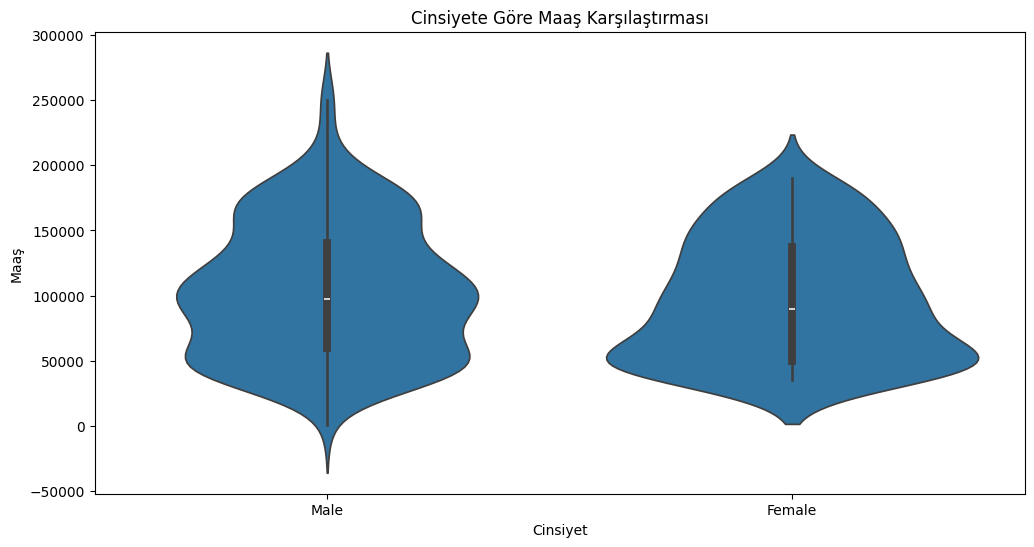

In [41]:
def cinsiyetXmaas(data):
    plt.figure(figsize=(12, 6))
    sns.violinplot(x='Gender', y='Salary', data=data)
    plt.title('Cinsiyete Göre Maaş Karşılaştırması')
    plt.xlabel('Cinsiyet')
    plt.ylabel('Maaş')
    plt.show()
cinsiyetXmaas(df)

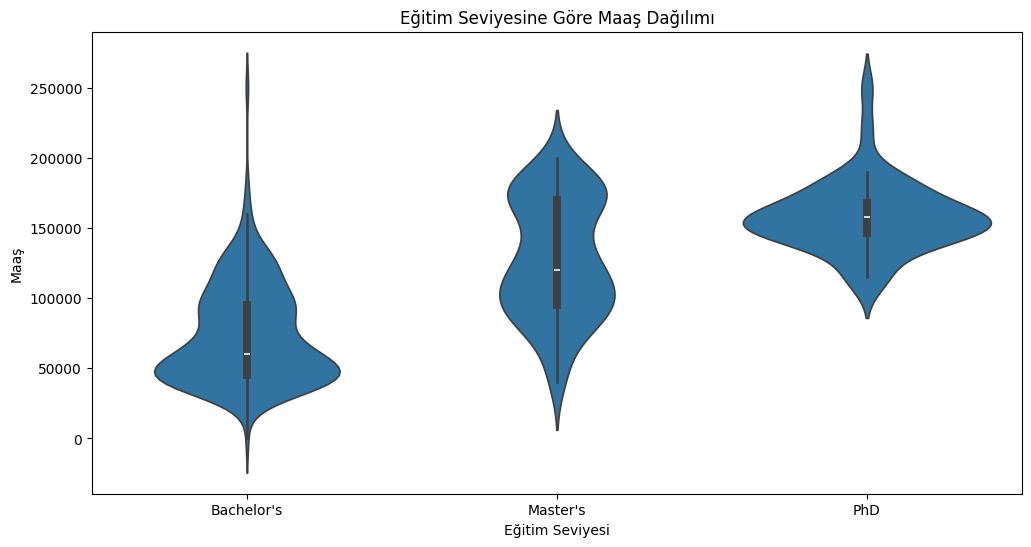

In [42]:
def egitimSeviyesiXmaas(data):
    plt.figure(figsize=(12, 6))
    sns.violinplot(x='Education_Level', y='Salary', data=data)
    plt.title('Eğitim Seviyesine Göre Maaş Dağılımı')
    plt.xlabel('Eğitim Seviyesi')
    plt.ylabel('Maaş')
    plt.show()
egitimSeviyesiXmaas(df)

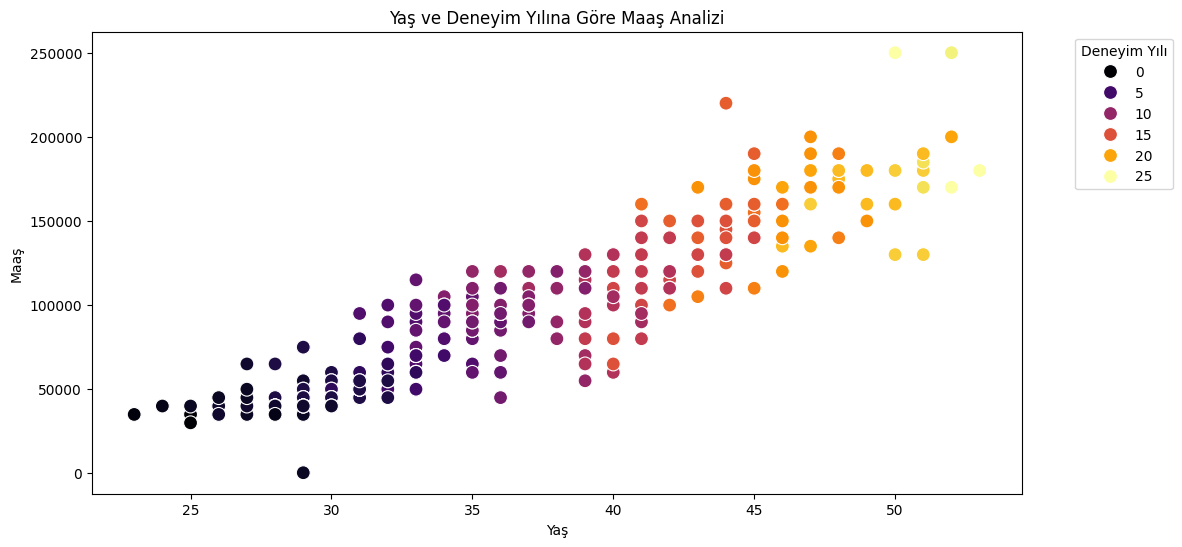

In [43]:
def yasDeneyimXmaas(data):
    plt.figure(figsize=(12, 6))
    sns.scatterplot(x='Age', y='Salary', hue='Years_of_Experience', data=data, palette='inferno', s=100)
    plt.title('Yaş ve Deneyim Yılına Göre Maaş Analizi')
    plt.xlabel('Yaş')
    plt.ylabel('Maaş')
    plt.legend(title='Deneyim Yılı', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()
yasDeneyimXmaas(df)

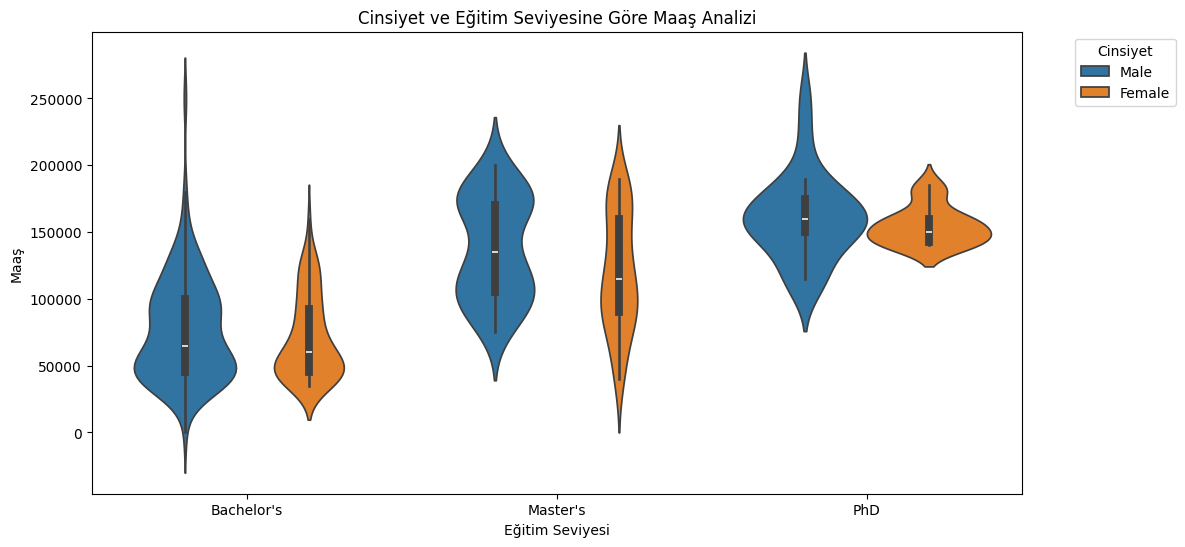

In [44]:
def cinsiyetEgitimXmaas(data):
    plt.figure(figsize=(12, 6))
    sns.violinplot(x='Education_Level', y='Salary', hue='Gender', data=data)
    plt.title('Cinsiyet ve Eğitim Seviyesine Göre Maaş Analizi')
    plt.xlabel('Eğitim Seviyesi')
    plt.ylabel('Maaş')
    plt.legend(title='Cinsiyet', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()
cinsiyetEgitimXmaas(df)

In [45]:
data = df.copy()  
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])
data['Education_Level'] = label_encoder.fit_transform(data['Education_Level'])

In [46]:
data.head()

,Age,Gender,Education_Level,Years_of_Experience,Salary,job_title_bert_cluster
0,32.0,1,0,5.0,90000.0,9
1,28.0,0,1,3.0,65000.0,3
2,45.0,1,2,15.0,150000.0,6
3,36.0,0,0,7.0,60000.0,4
4,52.0,1,1,20.0,200000.0,2


In [47]:
correlation = data.corr()
print(correlation['Salary'])

Age                       0.916543
Gender                    0.075420
Education_Level           0.661900
Years_of_Experience       0.924455
Salary                    1.000000
job_title_bert_cluster   -0.075922
Name: Salary, dtype: float64


In [48]:


bins = [0, 30, 45, 60]
labels = ['Young', 'Mid', 'Senior']

# 'Age' sütununa göre yeni 'Age_Group' sütununu oluştur
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# 'Age_Group' sütununu one-hot encoding ile dönüştür
df = pd.get_dummies(df, columns=['Age_Group'])

# Güncellenmiş veri setinin ilk birkaç satırını göster
print(df.head())


    Age  Gender Education_Level  Years_of_Experience    Salary  \
0  32.0    Male      Bachelor's                  5.0   90000.0   
1  28.0  Female        Master's                  3.0   65000.0   
2  45.0    Male             PhD                 15.0  150000.0   
3  36.0  Female      Bachelor's                  7.0   60000.0   
4  52.0    Male        Master's                 20.0  200000.0   

   job_title_bert_cluster  Age_Group_Young  Age_Group_Mid  Age_Group_Senior  
0                       9            False           True             False  
1                       3             True          False             False  
2                       6            False          False              True  
3                       4            False           True             False  
4                       2            False          False              True  


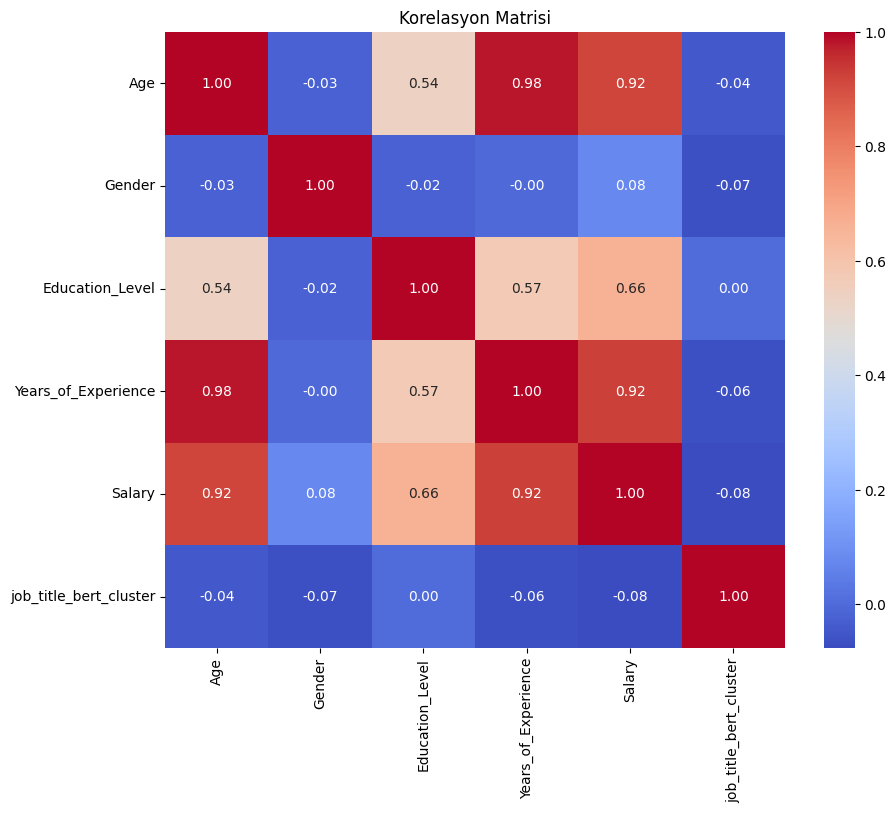

In [49]:
# Korelasyon matrisini görselleştirme
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Korelasyon Matrisi')
plt.show()

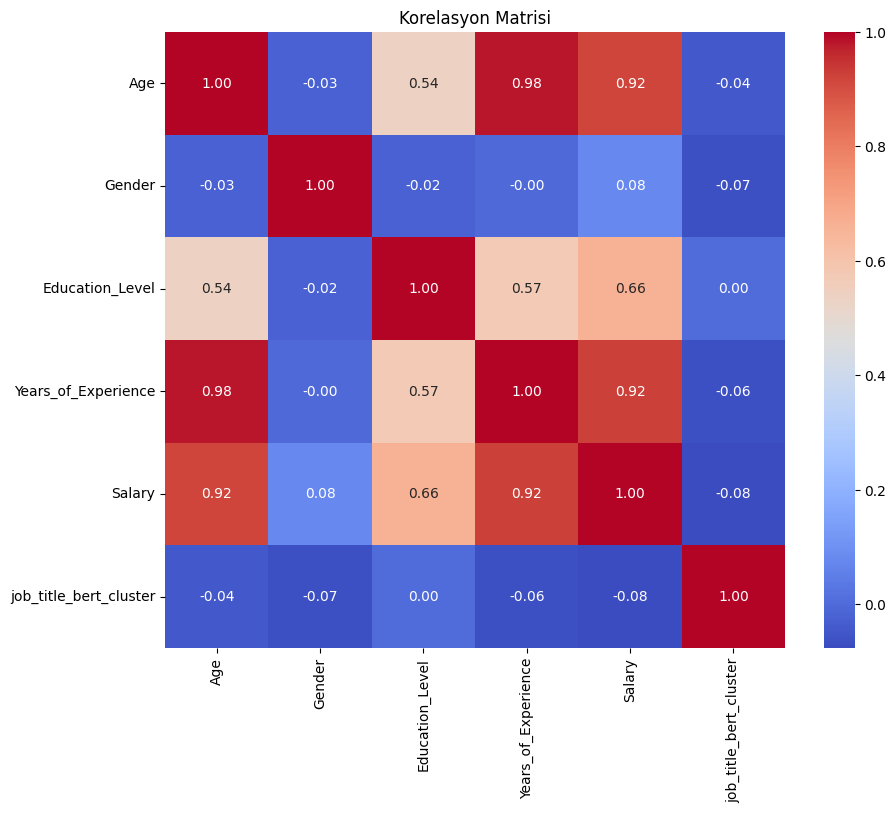

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_correlation_matrix(correlation_matrix):
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Korelasyon Matrisi')
    plt.show()

# Örnek bir korelasyon matrisi
correlation_matrix = data.corr()  # df, veri çerçevenizin adı olsun

# Korelasyon matrisini görselleştirme
plot_correlation_matrix(correlation_matrix)


In [51]:
# Korelasyon grafikleri
columns = ['Age', 'Gender', 'Education_Level', 'job_title_bert_cluster','Years_of_Experience']

for col in columns:
    fig = px.scatter(df, x=col, y='Salary', title=f'Salary vs {col.capitalize()}')
    fig.show()

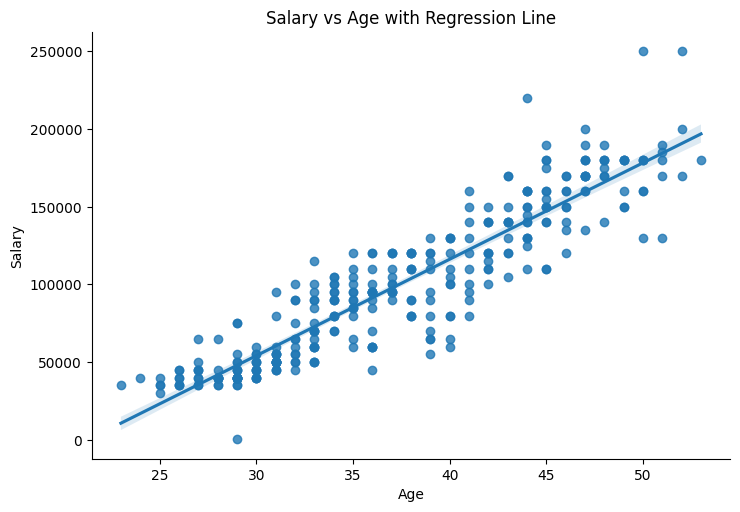

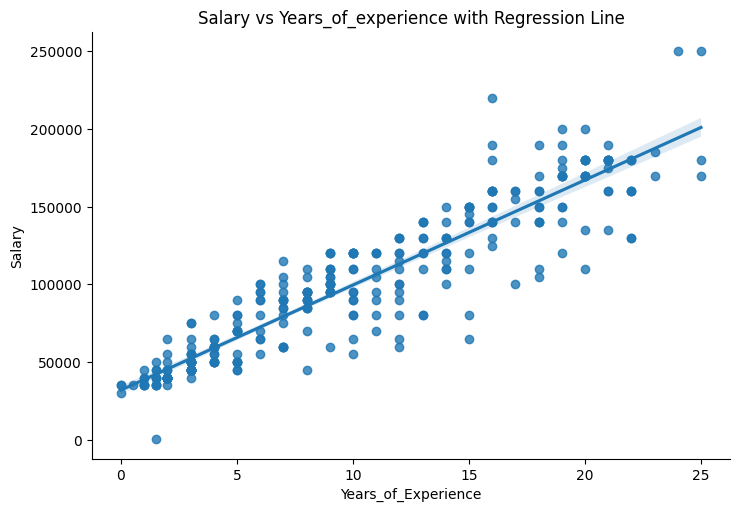

In [52]:
columns = ['Age',  'Years_of_Experience']

for col in columns:
    sns.lmplot(x=col, y='Salary', data=data, aspect=1.5)
    plt.title(f'Salary vs {col.capitalize()} with Regression Line')
    plt.show()

In [53]:
data= data.drop( ['Gender'], axis=1)
data.head(10)

,Age,Education_Level,Years_of_Experience,Salary,job_title_bert_cluster
0,32.0,0,5.0,90000.0,9
1,28.0,1,3.0,65000.0,3
2,45.0,2,15.0,150000.0,6
3,36.0,0,7.0,60000.0,4
4,52.0,1,20.0,200000.0,2
5,29.0,0,2.0,55000.0,5
6,42.0,1,12.0,120000.0,1
7,31.0,0,4.0,80000.0,4
8,26.0,0,1.0,45000.0,7
9,38.0,2,10.0,110000.0,3


In [54]:
data= data.drop( ['Age'], axis=1)
data.head(10)

,Education_Level,Years_of_Experience,Salary,job_title_bert_cluster
0,0,5.0,90000.0,9
1,1,3.0,65000.0,3
2,2,15.0,150000.0,6
3,0,7.0,60000.0,4
4,1,20.0,200000.0,2
5,0,2.0,55000.0,5
6,1,12.0,120000.0,1
7,0,4.0,80000.0,4
8,0,1.0,45000.0,7
9,2,10.0,110000.0,3


In [55]:
# scaler = MinMaxScaler()
# df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

In [56]:
# Bağımsız ve bağımlı değişkenleri ayırma
X = data.drop('Salary', axis=1)
y = data['Salary']

# Veri setini eğitim ve test setlerine bölme
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [57]:
# Random Forest modeli oluşturma
model = LinearRegression()


In [58]:
start_train_time = time.time()
model.fit(X_train, y_train)
end_train_time = time.time()
training_time = end_train_time - start_train_time

In [59]:
# cross-validation 
mse_scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5)
r2_scores = cross_val_score(model, X, y, scoring='r2', cv=5)

print(f"Mean Squared Error (Cross-Validation): {-np.mean(mse_scores)}")
print(f"R^2 Score (Cross-Validation): {np.mean(r2_scores)}")

Mean Squared Error (Cross-Validation): 342930949.4698263
R^2 Score (Cross-Validation): 0.8547436483713442


In [60]:
# Cross-validation ile model performansını değerlendirme
start_cv_time = time.time()
mse_scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5)
r2_scores = cross_val_score(model, X, y, scoring='r2', cv=5)
end_cv_time = time.time()
cv_time = end_cv_time - start_cv_time




In [61]:
# Modeli eğitme
model.fit(X_train, y_train)

LinearRegression()

In [62]:
# Tahminler
y_pred = model.predict(X_test)

In [63]:

# # Sonuçları gösterme
# print(f"Mean Squared Error (Cross-Validation): {-np.mean(mse_scores)}")
# print(f"R^2 Score (Cross-Validation): {np.mean(r2_scores)}")

# print("Eğitim Süresi:", training_time)
# print("Cross-validation Süresi:", cv_time)

# # Performans metriği hesaplama
# mse = mean_squared_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)
# mape = mean_absolute_percentage_error(y_test, y_pred)
# accuracy = (1 - mape) * 100

# print(f"Mean Squared Error: {mse}")
# print(f"R^2 Score: {r2}")
# print(f"Mean Absolute Percentage Error: {mape}")
# print(f"Accuracy: {accuracy}%")

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
import time

def check_overfitting(df):
    # Kategorik sütunları encode et
    data = df.copy()
    label_encoder_gender = LabelEncoder()
    label_encoder_education = LabelEncoder()
    data['Gender'] = label_encoder_gender.fit_transform(data['Gender'])
    data['Education_Level'] = label_encoder_education.fit_transform(data['Education_Level'])
    
    # One-hot encoding for Age_Group
    bins = [0, 30, 45, 60]
    labels = ['Young', 'Mid', 'Senior']
    data['Age_Group'] = pd.cut(data['Age'], bins=bins, labels=labels, right=False)
    data = pd.get_dummies(data, columns=['Age_Group'])

    scaler_experience = MinMaxScaler()
    scaler_salary = MinMaxScaler()
    data['Years_of_Experience'] = scaler_experience.fit_transform(data['Years_of_Experience'].values.reshape(-1, 1))
    data['Salary'] = scaler_salary.fit_transform(data['Salary'].values.reshape(-1, 1))
    
    X = data.drop('Salary', axis=1)
    y = data['Salary']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    mse_scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5)
    r2_scores = cross_val_score(model, X, y, scoring='r2', cv=5)

    print(f"Mean Squared Error (Cross-Validation): {-np.mean(mse_scores)}")
    print(f"R^2 Score (Cross-Validation): {np.mean(r2_scores)}")

    start_cv_time = time.time()
    mse_scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5)
    r2_scores = cross_val_score(model, X, y, scoring='r2', cv=5)
    end_cv_time = time.time()
    cv_time = end_cv_time - start_cv_time
    
    train_mse = mean_squared_error(y_train, y_train_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    train_accuracy = model.score(X_train, y_train)
    
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    test_accuracy = model.score(X_test, y_test)

    print(f"Train Mean Squared Error: {train_mse}")
    print(f"Train R^2 Score: {train_r2}")
    print(f"Train Accuracy: {train_accuracy}")
    print(f"Test Mean Squared Error: {test_mse}")
    print(f"Test R^2 Score: {test_r2}")
    print(f"Test Accuracy: {test_accuracy}")
    print(f"Cross-Validation Time: {cv_time}")

check_overfitting(df)


In [64]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
import time

def check_overfitting(df):
    # Kategorik sütunları encode et
    data = df.copy()
    label_encoder_gender = LabelEncoder()
    label_encoder_education = LabelEncoder()

    scaler_experience = MinMaxScaler()
    scaler_salary = MinMaxScaler()
    data['Years_of_Experience'] = scaler_experience.fit_transform(data['Years_of_Experience'].values.reshape(-1, 1))
    data['Salary'] = scaler_salary.fit_transform(data['Salary'].values.reshape(-1, 1))
    
    X = data.drop('Salary', axis=1)
    y = data['Salary']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    models = {
        'Linear Regression': LinearRegression(),
        'Decision Tree': DecisionTreeRegressor(random_state=42),
        'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
        'Support Vector Regressor': SVR(),
        'K-Nearest Neighbors': KNeighborsRegressor(),
        'XGBoost': XGBRegressor(random_state=42)
    }

    results = []

    for model_name, model in models.items():
        start_time = time.time()
        model.fit(X_train, y_train)
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
        end_time = time.time()

        mse_scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5)
        r2_scores = cross_val_score(model, X, y, scoring='r2', cv=5)

        train_mse = mean_squared_error(y_train, y_train_pred)
        train_r2 = r2_score(y_train, y_train_pred)
        train_accuracy = model.score(X_train, y_train)
        
        test_mse = mean_squared_error(y_test, y_test_pred)
        test_r2 = r2_score(y_test, y_test_pred)
        test_accuracy = model.score(X_test, y_test)

        results.append({
            'Model': model_name,
            'Train MSE': train_mse,
            'Train R^2': train_r2,
            'Train Accuracy': train_accuracy,
            'Test MSE': test_mse,
            'Test R^2': test_r2,
            'Test Accuracy': test_accuracy,
            'CV Mean MSE': -np.mean(mse_scores),
            'CV Mean R^2': np.mean(r2_scores),
            'Fit & Predict Time': end_time - start_time
        })

    results_df = pd.DataFrame(results)
    print(results_df)
    return results_df

# check_overfitting fonksiyonunu çalıştır ve sonuçları tablo olarak göster
results_df = check_overfitting(data)


                      Model  Train MSE  Train R^2  Train Accuracy  Test MSE  \
0         Linear Regression   0.004616   0.883585        0.883585  0.004140   
1             Decision Tree   0.001168   0.970535        0.970535  0.005038   
2             Random Forest   0.001610   0.959388        0.959388  0.004585   
3  Support Vector Regressor   0.006845   0.827358        0.827358  0.006866   
4       K-Nearest Neighbors   0.005037   0.872958        0.872958  0.009701   
5                   XGBoost   0.001180   0.970235        0.970235  0.004521   

   Test R^2  Test Accuracy  CV Mean MSE  CV Mean R^2  Fit & Predict Time  
0  0.863468       0.863468     0.005502     0.854744            0.000000  
1  0.833851       0.833851     0.007652     0.798539            0.009234  
2  0.848796       0.848796     0.006471     0.831404            0.146336  
3  0.773562       0.773562     0.007175     0.811194            0.000000  
4  0.680051       0.680051     0.009142     0.760211            0.00441

In [65]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import pandas as pd


    # encode categorical columns 
data = df.copy()
label_encoder_gender = LabelEncoder()
label_encoder_education = LabelEncoder()
label_encoder_title = LabelEncoder()
data['Gender'] = label_encoder_gender.fit_transform(data['Gender'])
data['Education_Level'] = label_encoder_education.fit_transform(data['Education_Level'])
data['job_title_bert_cluster'] = label_encoder_title.fit_transform(data['job_title_bert_cluster'])

    # normalization for numerical columns
scaler_age = MinMaxScaler()
scaler_experience = MinMaxScaler()
scaler_salary = MinMaxScaler()
data['Age'] = scaler_age.fit_transform(data['Age'].values.reshape(-1, 1))
data['Years_of_Experience'] = scaler_experience.fit_transform(data['Years_of_Experience'].values.reshape(-1, 1))
data['Salary'] = scaler_salary.fit_transform(data['Salary'].values.reshape(-1, 1))

    # Split features and output
X = data.drop('Salary', axis=1)
y = data['Salary']

    # Splitting data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Create model
model = RandomForestRegressor(n_estimators=100, random_state=42)

    # Train model
model.fit(X_train, y_train)

    # Predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
    
mse_scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5)
r2_scores = cross_val_score(model, X, y, scoring='r2', cv=5)

print(f"Mean Squared Error (Cross-Validation): {-np.mean(mse_scores)}")
print(f"R^2 Score (Cross-Validation): {np.mean(r2_scores)}")

start_cv_time = time.time()
mse_scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5)
r2_scores = cross_val_score(model, X, y, scoring='r2', cv=5)
end_cv_time = time.time()
cv_time = end_cv_time - start_cv_time


    # Calculate metrics for training set
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)
train_accuracy = model.score(X_train, y_train)

    # Calculate metrics for test set
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)
test_accuracy = model.score(X_test, y_test)

print(f"Train Mean Squared Error: {train_mse}")
print(f"Train R^2 Score: {train_r2}")
print(f"Train Accuracy: {train_accuracy}")
print(f"Test Mean Squared Error: {test_mse}")
print(f"Test R^2 Score: {test_r2}")
print(f"Test Accuracy: {test_accuracy}")



Mean Squared Error (Cross-Validation): 0.006104800533966266
R^2 Score (Cross-Validation): 0.8407106642260729
Train Mean Squared Error: 0.000923032535095661
Train R^2 Score: 0.976721077623476
Train Accuracy: 0.976721077623476
Test Mean Squared Error: 0.004257166554721776
Test R^2 Score: 0.8595987645600974
Test Accuracy: 0.8595987645600974


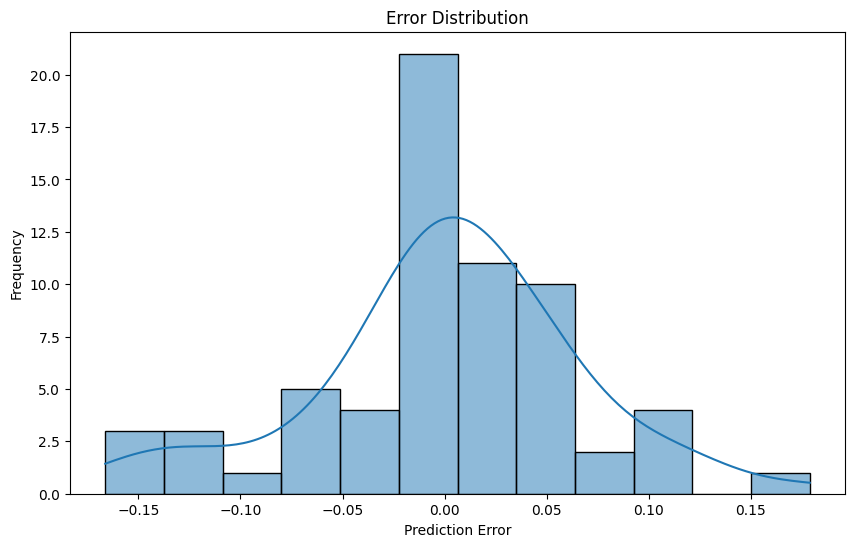

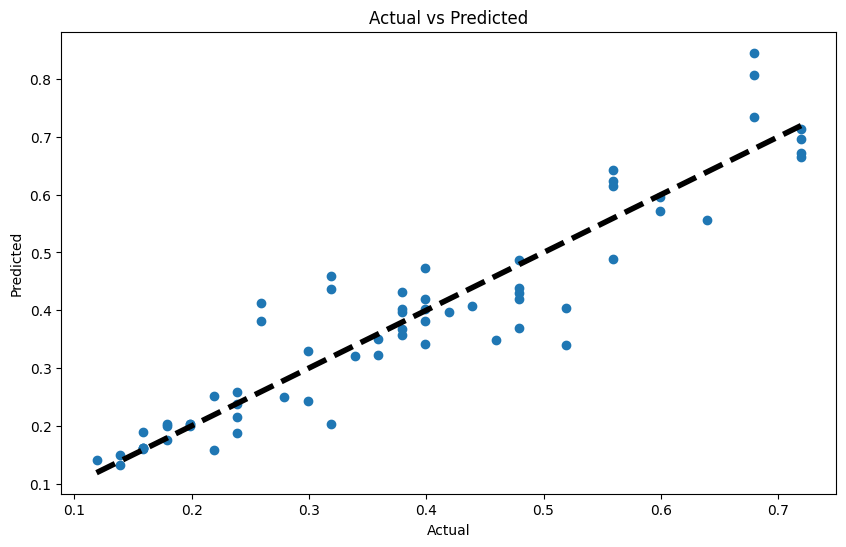

In [85]:
# Hata dağılımı
errors = y_test - y_test_pred
plt.figure(figsize=(10, 6))
sns.histplot(errors, kde=True)
plt.title('Error Distribution')
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.show()

# Gerçek ve tahmin edilen değerlerin karşılaştırılması
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()
